In [21]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [22]:
#load an image
image = Image.open("catimage.jpeg").convert("L") # as grayscale
image = image.resize((256, 256)) # for simplicity
image = np.array(image, dtype=np.float32)/ 255.0 # convert to float32 and normalize



In [23]:
# add batch and channer dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0,-1))

In [24]:
# define vertical and horizontal edge detetction filters
vertical_filter = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]], dtype=np.float32)

horizontal_filter = np.array([[-1,-1,-1],
                      [0,0,0],
                      [1,1,1]], dtype=np.float32)



In [25]:
# Reshape filter for tensorflow (H, W, in_channels, out_channels)
vertical_filter = vertical_filter.reshape(3,3,1,1)
horizontal_filter = horizontal_filter.reshape(3,3,1,1)

In [26]:
# Apply convolution
vertical_edges = tf.nn.conv2d(image, vertical_filter, strides=[1,1,1,1], padding="SAME")
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1,1,1,1], padding="SAME")


In [27]:
# convert tensors to numpy for visualization
vertical_edges = vertical_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()


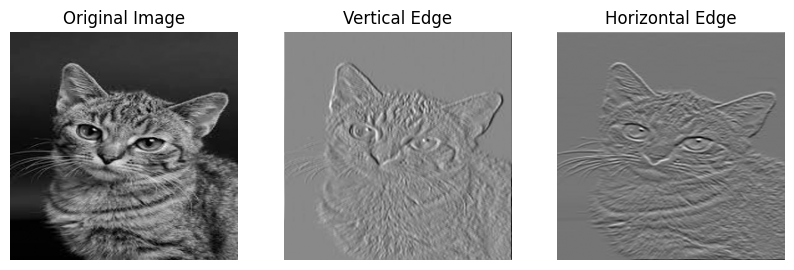

In [29]:
#plot original and filtered image
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(vertical_edges, cmap="gray")
plt.title("Vertical Edge")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(horizontal_edges, cmap="gray")
plt.title("Horizontal Edge")
plt.axis("off")
plt.show()